In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('drugTrain.csv')
test = pd.read_csv('drugTest.csv')

print("Shape of train: ", train.shape)
print("Shape of test: ", test.shape)

Shape of train:  (161297, 7)
Shape of test:  (53766, 7)


In [4]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [6]:
data = pd.concat([train, test])
data.shape

(215063, 7)

In [7]:
data.sample(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
66996,218912,Depakote,Bipolar Disorde,"""I&#039;ve been on this for 3 weeks now. It ha...",8,2-Jun-13,33
89557,53510,Onexton,Acne,"""Onexton is absolutely amazing! Have been usin...",10,21-May-15,20
157907,133587,Robaxin,Muscle Spasm,"""Not as good as Flexeril or Baclofen, but it&#...",7,1-May-12,50
156292,101435,Atralin,Acne,"""I had very good skin up until I hit 20 years ...",10,27-Aug-11,40
30932,80249,Benzonatate,Cough,"""I have COPD and this is the only thing that h...",10,24-Feb-11,9
159716,140152,Asenapine,Bipolar Disorde,"""Its a great drug. Its expensive. But for depr...",10,31-Oct-15,0
84296,21962,Infliximab,Rheumatoid Arthritis,"""I was diagnosed w/ severe RA in 2009 by my ge...",8,22-Feb-17,8
121001,223951,Levonorgestrel,Birth Control,"""After reading all of these helpful reviews, I...",5,6-Dec-16,2
76548,87515,Naproxen,Back Pain,"""Nursing student on feet all day, lifting pati...",10,29-Dec-15,23
44984,83588,Levocetirizine,Allergies,"""I have started using this about 5 months ago,...",2,3-May-10,18


In [8]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [10]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

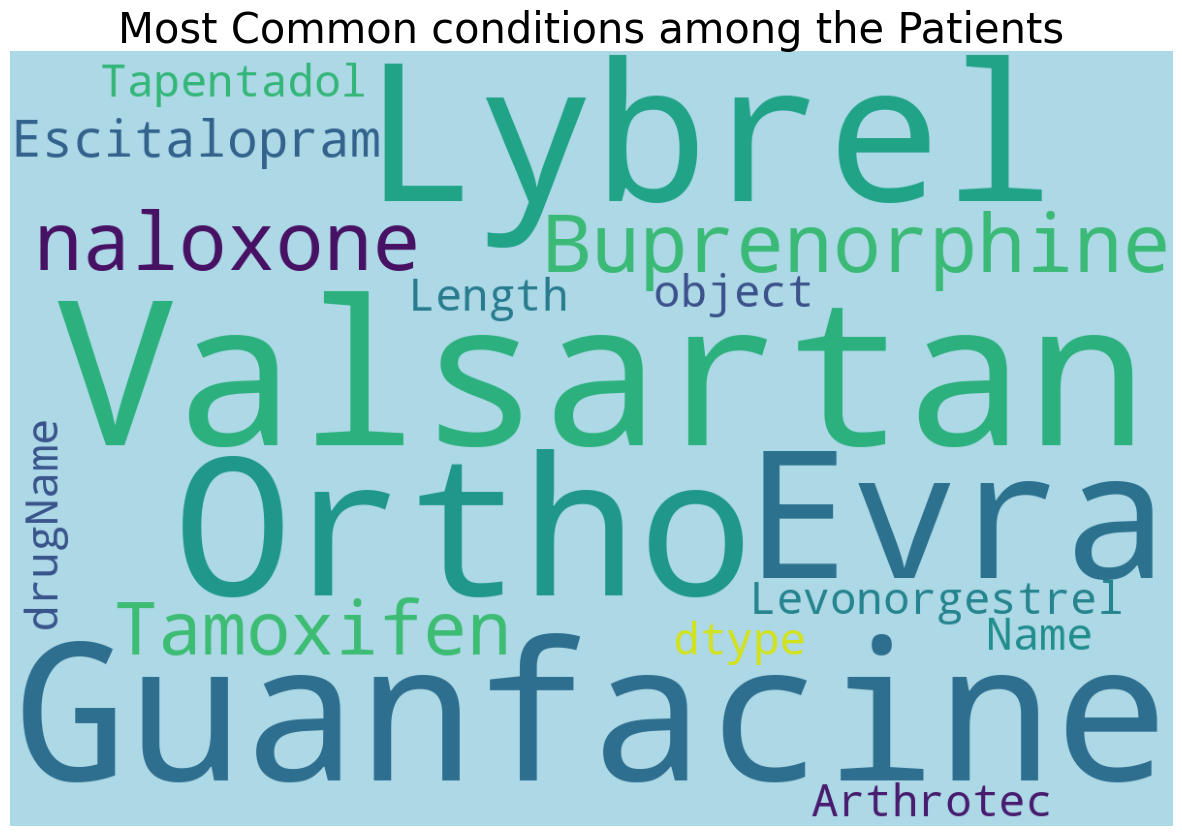

In [12]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, max_words= 100, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15,15)
plt.title('Most Common conditions among the Patients', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

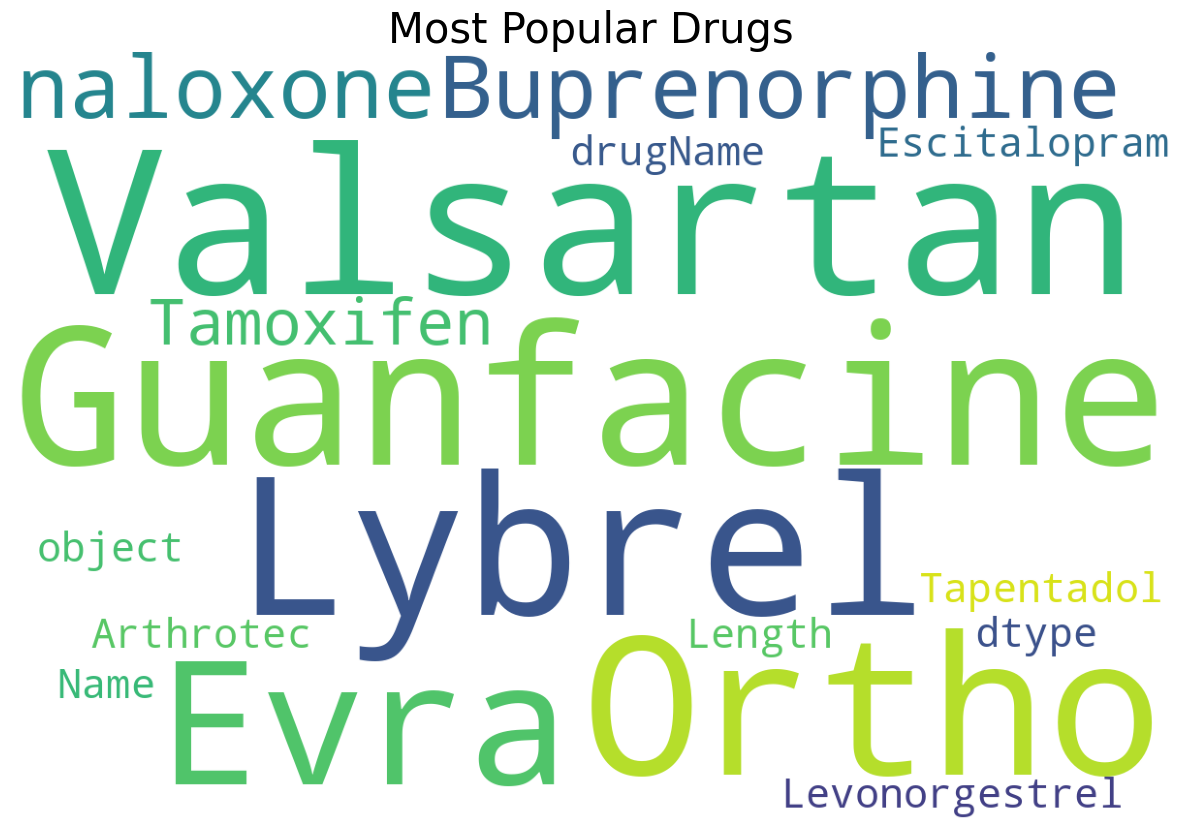

In [13]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words= 100, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15,15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

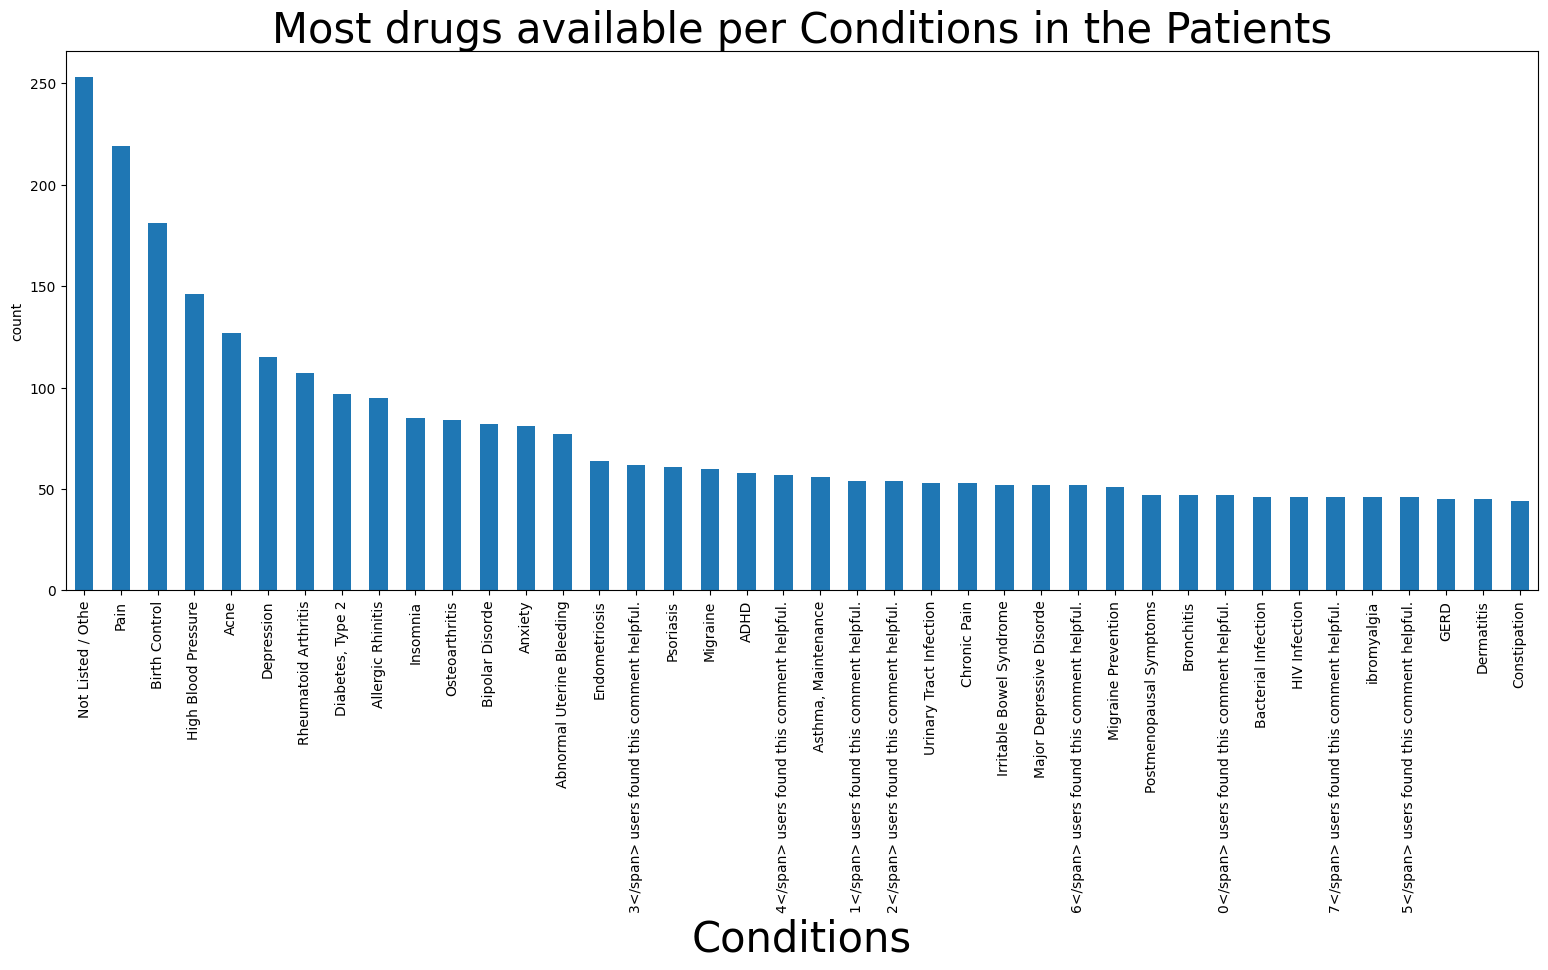

In [14]:
data.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19,7))
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize  = 30)
plt.ylabel('count')
plt.show()

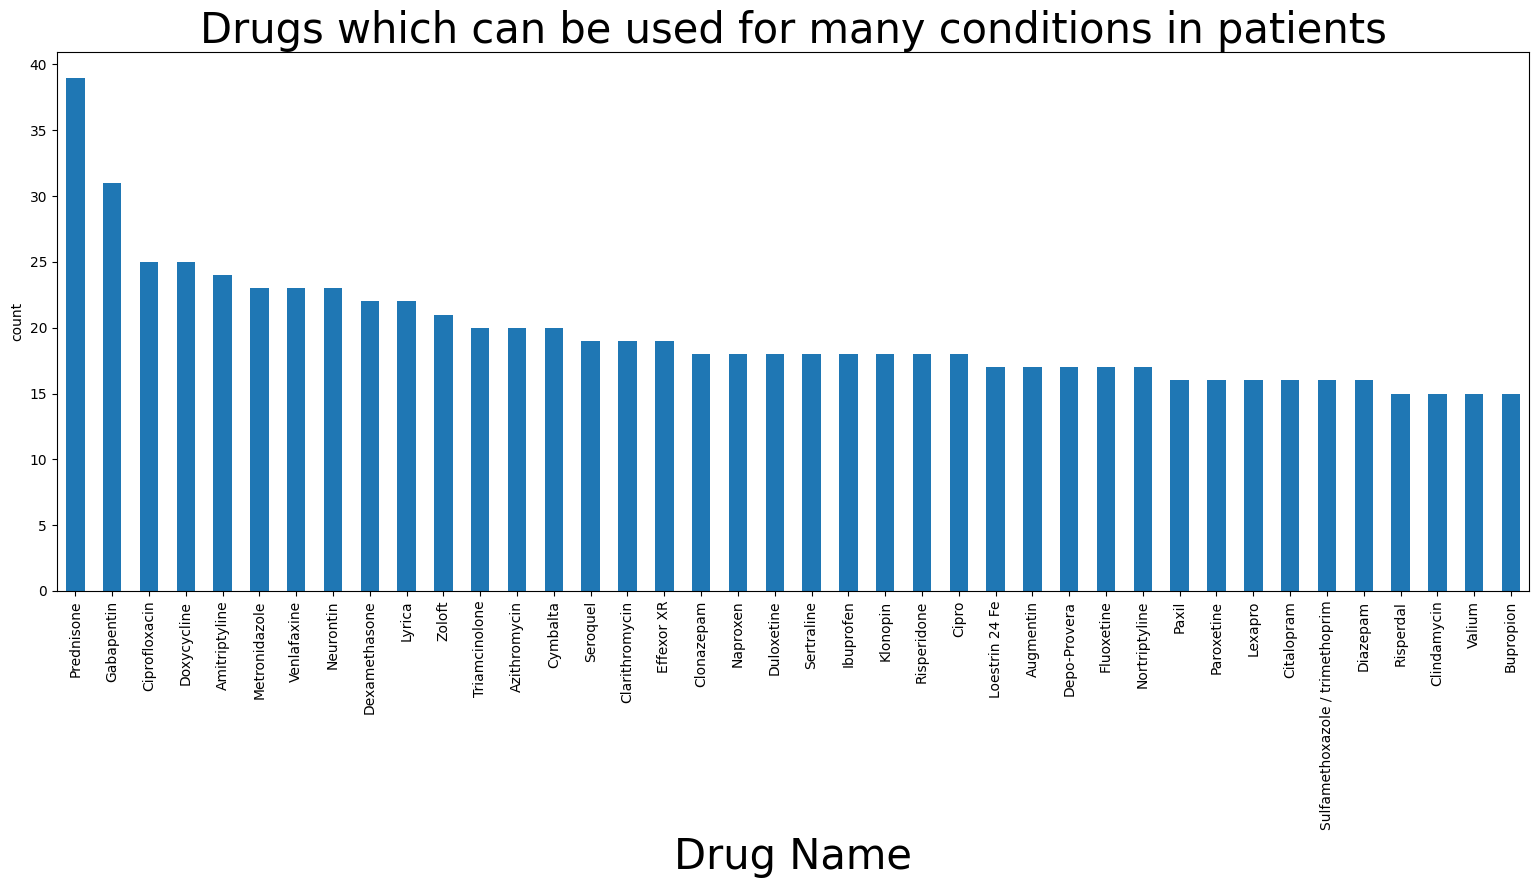

In [15]:
data.groupby(['drugName'])['condition'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19,7))
plt.title('Drugs which can be used for many conditions in patients', fontsize = 30)
plt.xlabel('Drug Name', fontsize  = 30)
plt.ylabel('count')
plt.show()

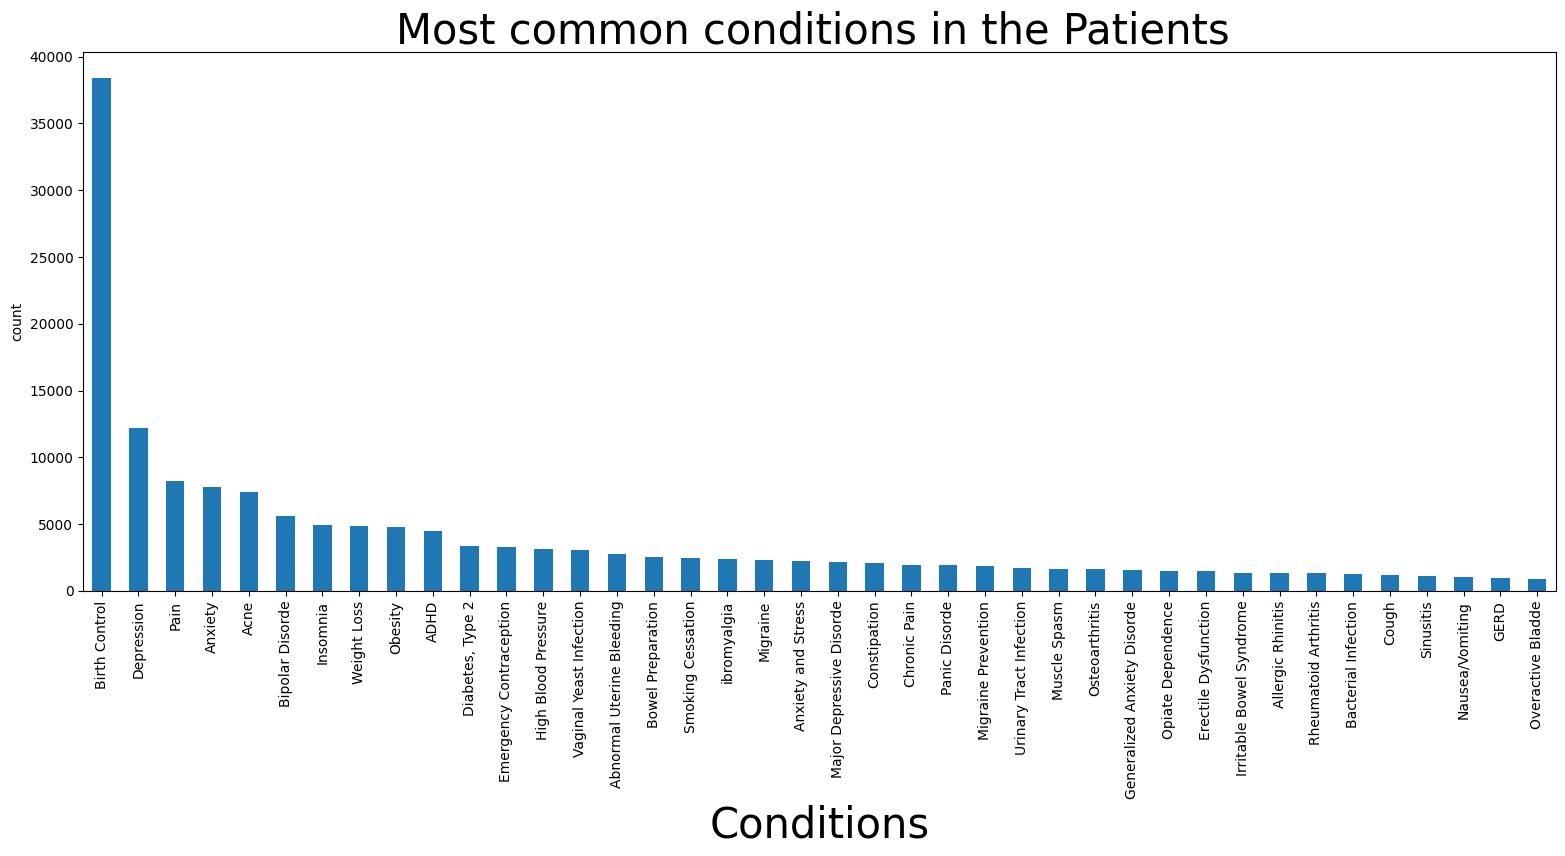

In [16]:
data['condition'].value_counts().head(40).plot.bar(figsize = (19,7))
plt.title('Most common conditions in the Patients ', fontsize = 30)
plt.xlabel('Conditions', fontsize  = 30)
plt.ylabel('count')
plt.show()

In [17]:
train['review'][3]

'"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"'

In [18]:
train['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [19]:
data['rating'].value_counts()

10    68005
9     36708
1     28918
8     25046
7     12547
5     10723
2      9265
3      8718
6      8462
4      6671
Name: rating, dtype: int64

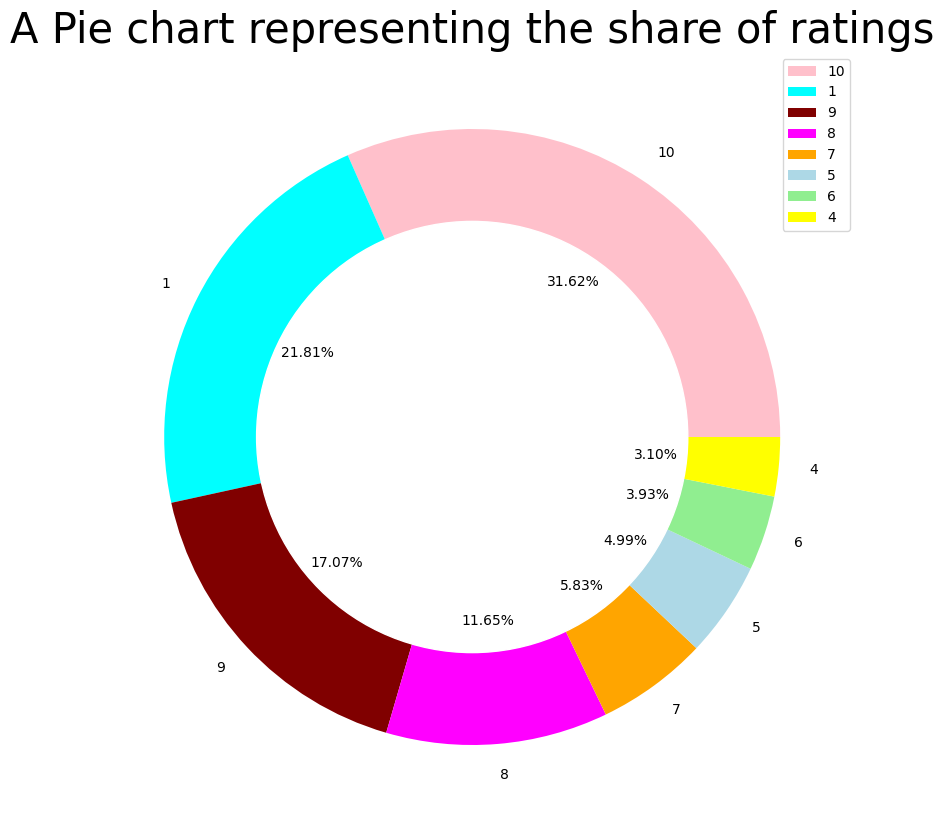

In [20]:
size = [68005, 46901, 36708,25046,12547,10723,8462,6671]
colors = ['pink','cyan','maroon','magenta','orange','lightblue','lightgreen','yellow']
labels = "10","1","9","8","7","5","6","4"

my_circle = plt.Circle((0,0),0.7, color = 'white')
plt.rcParams['figure.figsize'] = (10,10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie chart representing the share of ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [24]:
data.loc[(data['ratings'] >= 5),'rating'] = 1
data.loc[(data['ratings'] < 5),'rating'] = 0

data['rating'].value_counts()

KeyError: 'ratings'

In [25]:
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

data['Year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [28]:
plt.rcParams['figure.figsize'] = (19,8)
sns.countplot(data['Year'],palette='dark')
plt.title('The No. of Reviews in each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

ValueError: If using all scalar values, you must pass an index